<a href="https://colab.research.google.com/github/ludwigenvall/churn-prediction-dl/blob/main/03_train_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping



In [6]:
# Loading the simulated data from GitHub
url = "https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/main/data/simulated_behavior1.csv"
df = pd.read_csv(url)
df.head()

df['log_len'] = df['logins_seq'].apply(len)
df['support_len'] = df['support_seq'].apply(len)
df['data_len'] = df['data_seq'].apply(len)

print("Logins length counts:\n", df['log_len'].value_counts())
print("Support length counts:\n", df['support_len'].value_counts())
print("Data length counts:\n", df['data_len'].value_counts())



Logins length counts:
 log_len
91    2339
90    2148
92    1513
93     692
94     258
95      61
96      20
97       1
Name: count, dtype: int64
Support length counts:
 support_len
90    7032
Name: count, dtype: int64
Data length counts:
 data_len
584    840
585    776
583    746
582    695
586    630
581    599
587    502
580    456
588    406
579    321
589    257
578    247
590    130
577    129
576     76
591     68
575     43
592     41
574     24
593     20
573     10
594      8
572      6
571      2
Name: count, dtype: int64


In [7]:
# Download baseline LSTM model from repo
!wget https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/main/scripts/lstm_model.py
# Import functions from the file
from lstm_model import prepare_lstm_data, build_lstm_model, compile_lstm_model

X_train, X_test, y_train, y_test = prepare_lstm_data(df)
print("X_train shape:", X_train.shape)
print("First element shape:", np.array(X_train[0]).shape)


--2025-06-01 12:55:53--  https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/main/scripts/lstm_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1701 (1.7K) [text/plain]
Saving to: ‘lstm_model.py.1’

lstm_model.py.1     100%[===================>]   1.66K  --.-KB/s    in 0s      

2025-06-01 12:55:53 (4.90 MB/s) - ‘lstm_model.py.1’ saved [1701/1701]

X_train shape: (4922, 30, 3)
First element shape: (30, 3)


# Building and training LSTM model

In [8]:
# Build and compile
input_shape = (X_train.shape[1], X_train.shape[2])  # (30, 3)
model = build_lstm_model(input_shape)
model = compile_lstm_model(model)

# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6631 - loss: 0.6075 - val_accuracy: 0.8467 - val_loss: 0.3592
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8641 - loss: 0.3345 - val_accuracy: 0.9076 - val_loss: 0.2508
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8970 - loss: 0.2518 - val_accuracy: 0.8792 - val_loss: 0.3301
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9020 - loss: 0.2516 - val_accuracy: 0.9086 - val_loss: 0.2094
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9130 - loss: 0.2165 - val_accuracy: 0.9147 - val_loss: 0.2144
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9088 - loss: 0.2297 - val_accuracy: 0.9168 - val_loss: 0.2055
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9053 - loss: 0.2151 - val_accuracy: 0.9036 - val_loss: 0.2682
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9185 - loss: 0.2168 - val_accuracy: 0.9066 - val_loss: 0.

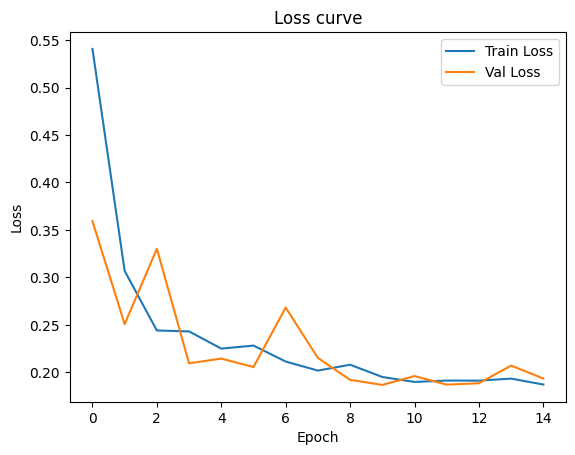

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 3)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = compile_lstm_model(model)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')
plt.show()